In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt# Matlab-style plotting
from sodapy import Socrata

In [73]:
client = Socrata("data.cityofnewyork.us", None)
results = client.get_all("8vv7-7wx3")

# Convert to pandas DataFrame
emc_df = pd.DataFrame.from_records(results)
emc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16890 entries, 0 to 16889
Data columns (total 5 columns):
date_and_time         16890 non-null object
email_body            16366 non-null object
notification_title    16890 non-null object
notificationtype      16890 non-null object
record_id             16890 non-null object
dtypes: object(5)
memory usage: 659.8+ KB


In [74]:
emc_df.drop(columns = ['email_body'], axis = 1, inplace=True)
emc_df.duplicated(keep = "first")
emc_df['notificationtype'] = emc_df['notificationtype'].astype('category')
emc_df['date_and_time'] = pd.to_datetime(emc_df['date_and_time'])
emc_df['date_and_time'] = emc_df['date_and_time'].dt.date

In [75]:
#delete blank
emc_df["notification_title"]=emc_df["notification_title"].apply(lambda x: np.NaN if x== "[blank]" else x)

In [76]:
# only take data after 2020-3-2
import datetime
import time
str='2020-03-02'
d=datetime.date(*map(int,str.split('-')))

emc_df = emc_df[ emc_df['date_and_time'].apply(lambda x: x > d)]
emc_df.rename(columns ={'date_and_time': 'Date'}, inplace = True )


In [77]:
emc_type_totalcount_df = emc_df.groupby(['notificationtype'])['record_id'].count().reset_index(name = 'totalcount')
print(emc_type_totalcount_df)

              notificationtype  totalcount
0            Aerial (Fly-Over)          19
1           Drills / Exercises           0
2                Environmental          29
3                         Fire           9
4               Infrastructure           0
5      Mass Transit Disruption          43
6     Mass Transit Restoration          30
7                Missing Adult          19
8   Missing Child / Adolescent           2
9                      Parking           6
10            Public Awareness          17
11               Public Health         117
12                Road Closure         179
13         School Notification           5
14                  Structural           1
15                     Utility          18
16                     Weather          51


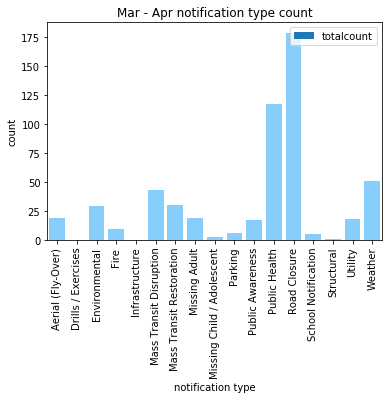

In [78]:
emc_type_totalcount_df.plot(kind='bar')
# 柱子的宽度
width = 0.35
height = 1
y_data = emc_type_totalcount_df.totalcount
x_labels = [i for i in emc_type_totalcount_df.notificationtype]
# 绘制柱状图, 每根柱子的颜色为紫罗兰色
plt.bar(range(len(x_labels)),y_data,tick_label= x_labels, color="#87CEFA")
# 设置横轴标签
plt.xlabel('notification type')
# 设置纵轴标签
plt.ylabel('notification number')
# 添加标题
plt.title('Mar - Apr notification type statics')
plt.legend(loc="upper right")
plt.show()